## Does the size of a tumor affect its malignancy?


* Here we can compare the size of B tumor to M tumor
- use mask to select all rows diag as M and B respectively and put them in seperate data frames. df_mean[df_mean['diagnosis']=='M']
- mask = df_mean['diagnosis']=='M' #returns a pd series of booleans indicating whether the value in the diagnosis column equals M. Then indexing the original dataframe with the mask will return all rows where value of mask is true.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cancer_data_means.csv")
df.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [3]:
df.shape

(569, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#reame the M and B values in diagnosis to Malignant and Benign
df['diagnosis'].replace(['M', 'B'], ['Malignant','Benign'], inplace=True)
print(df['diagnosis'].value_counts()) #confirm update

Benign       357
Malignant    212
Name: diagnosis, dtype: int64


**What is the proportion of Benign:Malignant tumor in the data set?**

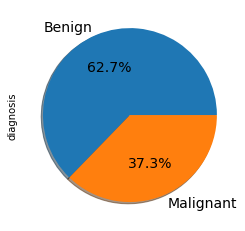

In [10]:
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%',  textprops={'fontsize': 14}, shadow=True);

We see that the Benign and Malignant tumors consist of 62.7% and 37.3% of the data respectively. Let us split the data to include data where diagnosis is Malignant and Benign respectively.

In [11]:
df_m = df[df['diagnosis']=='Malignant']
df_m.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,Malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,Malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [14]:
df_b = df[df['diagnosis']=='Benign']
df_b.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
19,Benign,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
20,Benign,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811


### Does the size of a tumor affect its malignancy?
Lets see summary statistics about area feature, a good metric for size

In [21]:
print("The area of the Malignant tumor and Benign tumor are respectively {} and {}".format(round(df_m['area'].mean(),2),
round(df_b['area'].mean(),2)))

The area of the Malignant tumor and Benign tumor are respectively 978.38 and 462.79


In [22]:
df_m.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440
